   ### POISNOUS MUSHROOM CLASSIFICATION PROJECT BY KARAN YADAV

In [2]:
# Loading necessary Libraries

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('C:/Kaggle/mushrooms/train.csv')   # Loading train dataset

In [4]:
test =  pd.read_csv('C:/Kaggle/mushrooms/test.csv')     # loading test dataset

In [5]:
test.shape

(2077964, 21)

In [6]:
train.shape

(3116945, 22)

In [7]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [8]:
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [10]:
# Checking for missing values
print('test data missing values')
print(test.isnull().sum())
print()
print()
print('train data missing values')
train.isnull().sum()

test data missing values
id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64


train data missing values


id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [11]:
# Calculating % of missing values in the data set

for i in train.columns:
    print(i,'has',(train[i].isnull().sum()/len(train))*100,'percentage missing values')
    print()

id has 0.0 percentage missing values

class has 0.0 percentage missing values

cap-diameter has 0.00012833078543253088 percentage missing values

cap-shape has 0.0012833078543253089 percentage missing values

cap-surface has 21.528227158323293 percentage missing values

cap-color has 0.0003849923562975927 percentage missing values

does-bruise-or-bleed has 0.00025666157086506175 percentage missing values

gill-attachment has 16.809279599094626 percentage missing values

gill-spacing has 40.373987991446754 percentage missing values

gill-color has 0.0018287136924135651 percentage missing values

stem-height has 0.0 percentage missing values

stem-width has 0.0 percentage missing values

stem-root has 88.45273176138816 percentage missing values

stem-surface has 63.55136199066715 percentage missing values

stem-color has 0.0012191424616090434 percentage missing values

veil-type has 94.88434990030302 percentage missing values

veil-color has 87.93697033473481 percentage missing values

h

In [12]:
# dropping id column as it's of no use

train = train.drop(columns= 'id',axis=1)

In [13]:
# finding categorical columns

cat_columns = [i for i in train.columns if train[i].dtype == 'object']
cat_columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [14]:
# finding numerical columns

num_col = [i for i in train.columns if train[i].dtype != 'object']
num_col

['cap-diameter', 'stem-height', 'stem-width']

Boxplot for train data


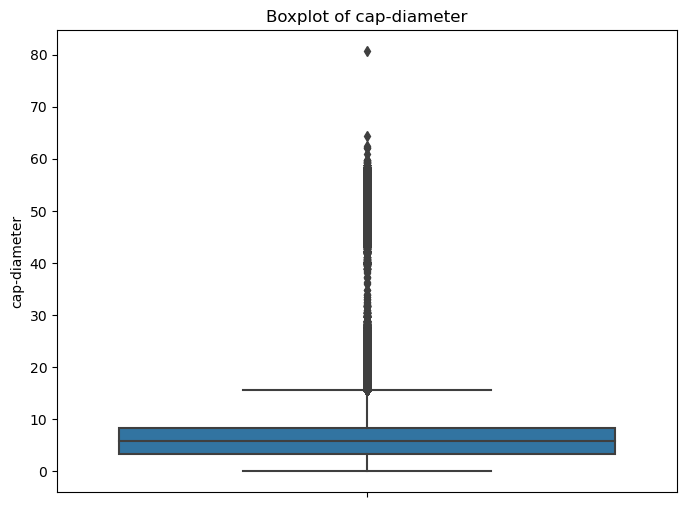

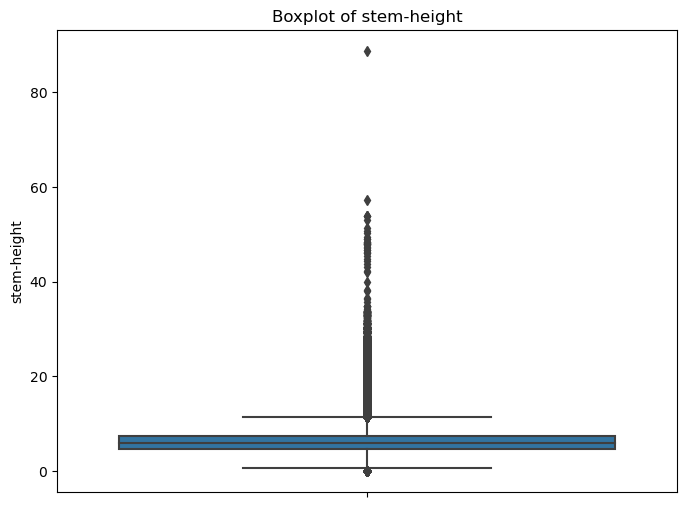

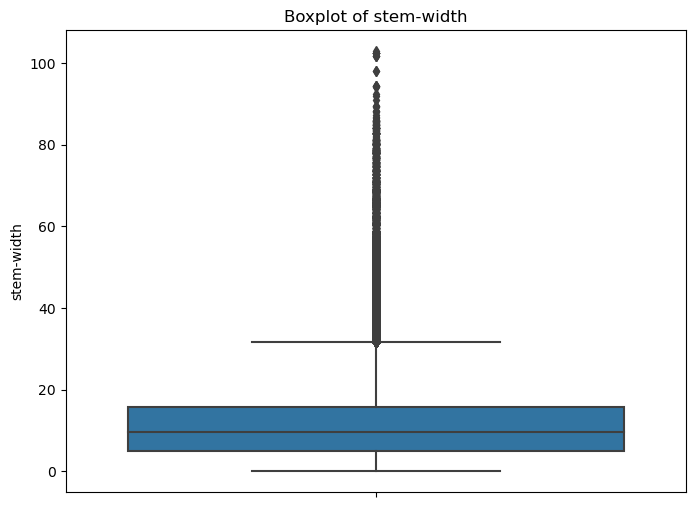

In [15]:
# Checking Whether features in the data set are normally distributed
print('Boxplot for train data')
for i in num_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(data= train, y = i)
    plt.title(f'Boxplot of {i}')
    plt.show()
    
print()    
    
    


In [16]:
num_col

['cap-diameter', 'stem-height', 'stem-width']

In [17]:
for i in num_col:
    Q3 = train[i].quantile(.75)
    Q1 = train[i].quantile(.25)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    median = train[i].median()
    train[i] = np.where((train[i] < lower_bound) | (train[i] > upper_bound), median, train[i])


Boxplot for test data


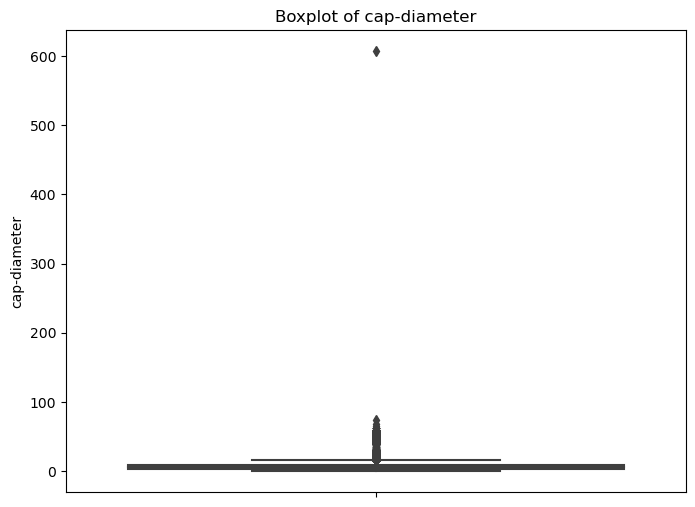

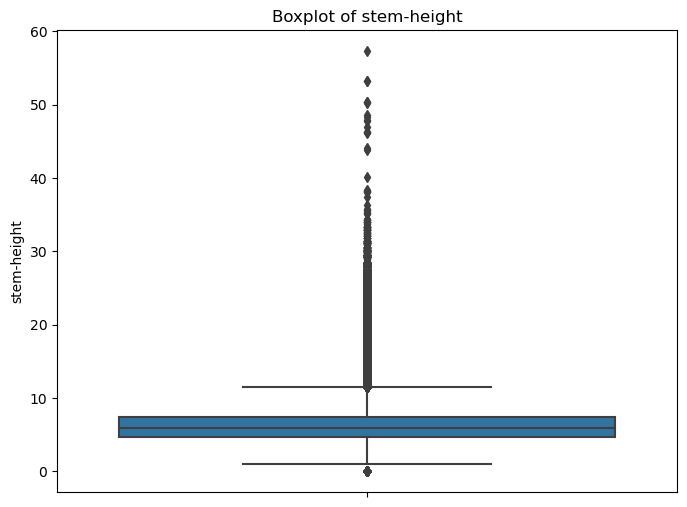

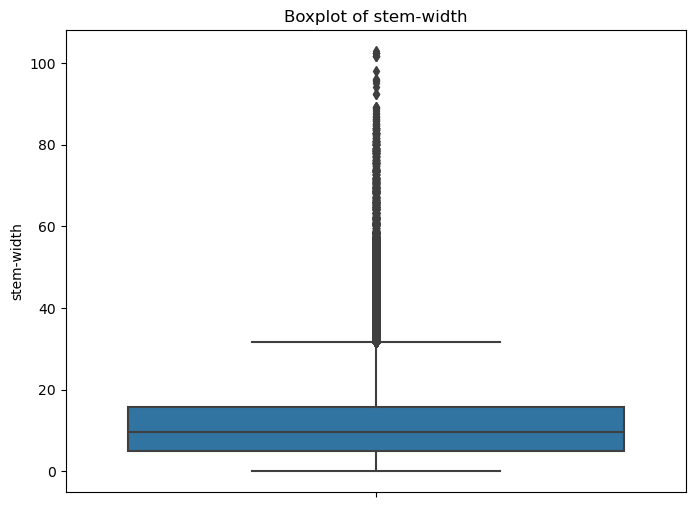

In [18]:
# Now checking the boxplot again after removing outliers

# Checking Whether features in the data set are normally distributed
    
    
    
    
print('Boxplot for test data')
for i in num_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(data= test, y = i)
    plt.title(f'Boxplot of {i}')
    plt.show()
    
print() 

In [19]:
train.shape

(3116945, 21)

In [20]:
test.shape

(2077964, 21)

In [21]:
# now dropping those columns that have more than 50 % missing values


for i in train.columns:
    if (train[i].isnull().sum()/len(train))*100 > 50:
        train.drop(columns= [i],inplace= True)
    else:
        pass
    
    
    
  
    

In [22]:
# now dropping those columns that have more than 50 % missing values


for i in test.columns:
    if (test[i].isnull().sum()/len(test))*100 > 50:
        test.drop(columns= [i],inplace= True)
    else:
        pass
    
    
    
  
    

In [23]:
# Now checking again % of missing values

# Calculating % of missing values in the data set
print('Train Columns')
print()
for i in train.columns:
    print(i,'has',(train[i].isnull().sum()/len(train))*100,'percentage missing values')
    print()
    
    


Train Columns

class has 0.0 percentage missing values

cap-diameter has 0.00012833078543253088 percentage missing values

cap-shape has 0.0012833078543253089 percentage missing values

cap-surface has 21.528227158323293 percentage missing values

cap-color has 0.0003849923562975927 percentage missing values

does-bruise-or-bleed has 0.00025666157086506175 percentage missing values

gill-attachment has 16.809279599094626 percentage missing values

gill-spacing has 40.373987991446754 percentage missing values

gill-color has 0.0018287136924135651 percentage missing values

stem-height has 0.0 percentage missing values

stem-width has 0.0 percentage missing values

stem-color has 0.0012191424616090434 percentage missing values

has-ring has 0.0007699847125951854 percentage missing values

ring-type has 4.134817906636145 percentage missing values

habitat has 0.0014437213361159725 percentage missing values

season has 0.0 percentage missing values



In [24]:
# Now checking again % of missing values

# Calculating % of missing values in the data set
print('Test Columns')
print()
for i in test.columns:
    print(i,'has',(test[i].isnull().sum()/len(test))*100,'percentage missing values')
    print()
    
    


Test Columns

id has 0.0 percentage missing values

cap-diameter has 0.0003368682036839907 percentage missing values

cap-shape has 0.0014918449020291016 percentage missing values

cap-surface has 21.50682109988431 percentage missing values

cap-color has 0.0006256123782702684 percentage missing values

does-bruise-or-bleed has 0.00048124029097712956 percentage missing values

gill-attachment has 16.834795982991043 percentage missing values

gill-spacing has 40.40469421029431 percentage missing values

gill-color has 0.002358077425787935 percentage missing values

stem-height has 4.8124029097712956e-05 percentage missing values

stem-width has 0.0 percentage missing values

stem-color has 0.001010604611051972 percentage missing values

has-ring has 0.0009143565528565462 percentage missing values

ring-type has 4.148050688077368 percentage missing values

habitat has 0.001203100727442824 percentage missing values

season has 0.0 percentage missing values



In [25]:
for i in test.select_dtypes(include='float').columns.to_list():
    train[i].fillna(train[i].median(),inplace= True)

In [26]:
for  i in test.select_dtypes(include = 'float').columns.to_list():
        print(i)

cap-diameter
stem-height
stem-width


In [27]:
for i in test.select_dtypes(include='float').columns.to_list():
    test[i].fillna(test[i].mode()[0],inplace= True)

In [28]:
# Now analysing Categorical data


cat_columns = [i for i in train.columns if train[i].dtype == 'object']
cat_columns

for i in cat_columns:
    print(i,' ---has',train[i].unique(),' values')
    print()
    

class  ---has ['e' 'p']  values

cap-shape  ---has ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']  values

cap-surface  ---has ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 

In [29]:
def  categorize_value(val):
    if isinstance(val, str) and len(val) == 1 and val.isalpha():
        return val
    else:
        return 'unknown'

In [30]:
cat_columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [31]:
cat_col = [i for i in cat_columns if i != 'class']   # removing class from categorical columns

In [32]:
cat_col

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [33]:
for i in cat_col:
    train[i] = train[i].apply(lambda x: categorize_value(x))

In [34]:
for i in cat_col:
    test[i] = test[i].apply(lambda x: categorize_value(x))

In [35]:
# Now consider top 7 variables in the categroical columns

def categorize_top_values(column, top_n = 7):
    
    value_counts = column.value_counts()
    
    top_values = value_counts.nlargest(top_n).index
    
    return column.apply(lambda x: x if x in top_values else 'unknown')



In [36]:
for i in cat_col:
    train[i] = categorize_top_values(train[i], top_n=7)

In [37]:
for i in cat_col:
    test[i] = categorize_top_values(test[i], top_n=7)

In [38]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,unknown,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,unknown,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,unknown,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,unknown,w,f,d,unknown,w,3.37,8.36,w,f,f,g,a


In [39]:
# Spliiting the train data into test and train sets

In [40]:
X = train.drop(columns= 'class', axis = 1)

In [41]:
y = train['class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size= .1)

In [43]:
# label encoding the class category

In [44]:
le = LabelEncoder()

In [45]:
y_train_encoded = le.fit_transform(y_train)

In [46]:
y_test_encoded = le.transform(y_test)

In [47]:
# one hot encoding categroical varibales

one_hot_encoder = OneHotEncoder()

In [48]:
cat_columns = X_train.select_dtypes(include= 'object').columns.to_list()
cat_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [49]:
X_train_cat = X_train[cat_columns]

In [50]:
X_test_cat = X_test[cat_columns]

In [51]:
cont_columns = X_train.columns.difference(cat_columns)

In [52]:
cont_columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

In [53]:
X_train_cont = X_train[cont_columns].reset_index(drop= True)
X_test_cont = X_test[cont_columns].reset_index(drop= True)

In [54]:
one_hot = OneHotEncoder(handle_unknown= 'ignore',sparse_output= False,drop= 'first')

In [55]:
X_train_encoded = one_hot.fit_transform(X_train_cat)

In [56]:
X_train_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [57]:
X_test_encoded = one_hot.transform(X_test_cat)

In [58]:
encoded_columns = one_hot.get_feature_names_out(input_features= X_train_cat.columns)

In [59]:
X_train_enc1 = pd.DataFrame(X_train_encoded,columns= encoded_columns)
X_train_enc1.reset_index(drop= True)

,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_unknown,cap-shape_x,cap-surface_g,cap-surface_h,cap-surface_s,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_unknown,habitat_w,season_s,season_u,season_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805245,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805246,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805247,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805248,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X_test_en1 = pd.DataFrame(X_test_encoded,columns= encoded_columns)
X_test_en1.reset_index(drop= True)

,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_unknown,cap-shape_x,cap-surface_g,cap-surface_h,cap-surface_s,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_unknown,habitat_w,season_s,season_u,season_w
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
311693,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_train_final = pd.concat([X_train_cont,X_train_enc1],axis=1)

In [62]:
X_test_final = pd.concat([X_test_cont,X_test_en1],axis =1)

In [63]:
X_test_final.isnull().sum().sum()

0

In [64]:
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,3116945,8.64,x,unknown,n,t,unknown,unknown,w,11.13,17.12,w,t,unknown,d,a
1,3116946,6.90,o,t,o,f,unknown,c,y,1.27,10.75,n,f,f,d,a
2,3116947,2.00,b,g,n,f,unknown,c,n,6.18,3.14,n,f,f,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,3116949,6.17,x,h,y,f,p,unknown,y,6.73,13.70,y,t,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a
2077961,5194906,5.73,x,unknown,e,f,a,unknown,w,6.16,9.74,y,t,z,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a


In [65]:
test.drop(columns='id',axis=1,inplace= True)

In [66]:
test_cat = test[test.select_dtypes(include='object').columns.to_list()]

In [67]:
test_cat_enc = one_hot.transform(test_cat)

In [68]:
encoded_columns = one_hot.get_feature_names_out(input_features= X_train_cat.columns)

In [69]:
test_cat_df = pd.DataFrame(test_cat_enc,columns= encoded_columns).reset_index(drop= True)

In [70]:
test_cont = test[test.columns.difference(test.select_dtypes(include='object').columns.to_list())].reset_index(drop= True)

In [71]:
test_final = pd.concat([test_cont, test_cat_df],axis=1)

In [72]:
test_final

,cap-diameter,stem-height,stem-width,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_unknown,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_unknown,habitat_w,season_s,season_u,season_w
0,8.64,11.13,17.12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.90,1.27,10.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.00,6.18,3.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.47,4.98,8.51,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.17,6.73,13.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,2.67,1.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2077960,3.12,2.69,7.38,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2077961,5.73,6.16,9.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2077962,5.03,6.00,3.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X_train_final

,cap-diameter,stem-height,stem-width,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_unknown,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_unknown,habitat_w,season_s,season_u,season_w
0,10.34,6.86,13.62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9.73,6.70,21.73,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.38,5.14,1.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.10,7.74,15.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14.66,7.76,28.37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805245,7.67,8.70,17.26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805246,9.88,5.10,25.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805247,5.75,6.20,9.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2805248,6.29,5.35,7.71,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
rf = RandomForestClassifier(random_state= 42)

In [75]:
X_train_final.isnull().sum()

cap-diameter       0
stem-height        0
stem-width         0
cap-shape_c        0
cap-shape_f        0
                  ..
habitat_unknown    0
habitat_w          0
season_s           0
season_u           0
season_w           0
Length: 77, dtype: int64

In [76]:
rf.fit(X_train_final,y_train_encoded)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = rf.predict(X_test_final)

In [78]:
accuracy_score(y_test_encoded,y_pred)

0.990686408187491

In [79]:
mcc = matthews_corrcoef(y_test_encoded,y_pred)

In [80]:
mcc

0.9812127108593006

In [81]:
test_pred = rf.predict(test_final)

In [82]:
# converting encode dvariables into original values

In [83]:
test_pred.shape

(2077964,)

In [84]:
test_predictions = le.inverse_transform(test_pred)

In [85]:
test_predictions

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [93]:
# Plotting confuson Matrix for the Model

In [97]:
cm = confusion_matrix(y_test_encoded,y_pred)

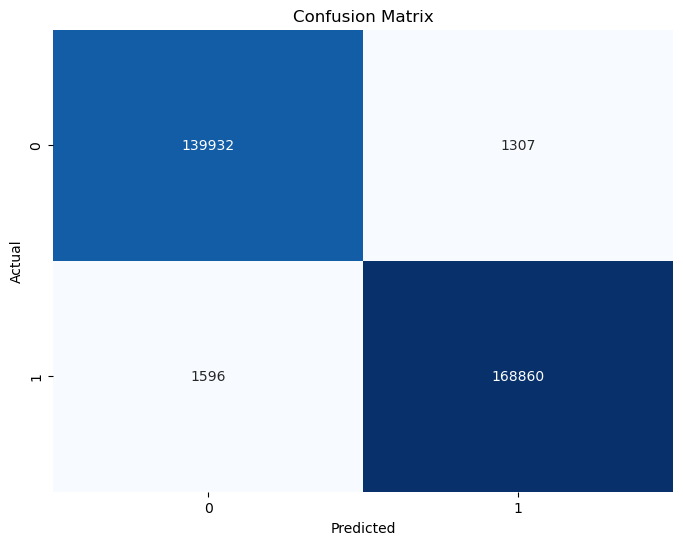

In [98]:
# Plottng the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Printing classification report

print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    141239
           1       0.99      0.99      0.99    170456

    accuracy                           0.99    311695
   macro avg       0.99      0.99      0.99    311695
weighted avg       0.99      0.99      0.99    311695



In [102]:
# From the classification report, we can conclude that precision, recall, f1  values are fairly good 
# and the model is effectively classifiying both the classes with minimal error.

In [87]:
sub

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [88]:
sub['id']

0          3116945
1          3116946
2          3116947
3          3116948
4          3116949
            ...   
2077959    5194904
2077960    5194905
2077961    5194906
2077962    5194907
2077963    5194908
Name: id, Length: 2077964, dtype: int64

In [89]:
submission = pd.DataFrame({'id':sub['id'],'class':test_predictions})

In [90]:
submission

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [91]:
final = submission.to_csv('subm.csv',index= False)